# Hierarchical Clustering

This notebook applies topic modeling on our dataset using Hierarchical Clustering to map the documents in our dataset to topics. Hierarchical Clustering is used to group similar documents together based on their similarity or dissimilarity. Initially each document is treated as a separate cluster. The algorithm then iteratively merges the most similar clusters, creating a hierarchy of nested clusters. This hierarchical structure captures the relationships between documents at different levels of granularity. 

The notebook follows the steps:

1. Preprocessing for Hierarchical Clustering
2. Vectorization
3. Define number of Clusters
3. Clustering
4. Visualization

## 0. Imports

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing_en import preprocess_data

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## 1. Preprocessing for Hierarchical Clustering

After loading the data file, we need to apply preprocessing steps to clean the original dataset. Therefore, we use the preprocessing function from our preprocessing notebook. There you will find further explanation and data exploration. For the LDA topic modeling we use every step from our preprocessing pipeline including the stemmer. This is somewhat not ideal for the later visualization as can be seen below. However, we expect better performance due to the reduction of variability of words. 

We also have two different versions of the website texts after translating them (further explanation in the translation python file): english and german. First, we tried german since we have more texts in german. However, translating from english to german introduced a bigger translation loss than the other way around. Using the english texts ended up performing better, which is why we use the english version.

In [3]:
# Read data as dataframe
df = pd.read_json('../../data/preprocessed/translated_results_en.json')

# Display the dataframe
df.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel Telephone advice +49 221 8282 8880 | S...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,Kunveno - Work Happier WORK HAPPIER Boost cult...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,ScopasWe're working on something new.Check it ...
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,Studymaniac - study successfully Open main men...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,Aicone - Artificial Intelligence Cloud One | A...


In [4]:
# Apply preprocessing on website text
df['website_text_in_en'] = preprocess_data(df['website_text_in_en'])
df.head()

,name,original_idx,website_url,website_text,original_language,website_text_in_en
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel telephon advic switzerland arrang call...
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,kunveno work happier work happier boost cultur...
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,scopaswer work someth new check here
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,studymaniac studi success open main menu partn...
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,aicon artifici intellig cloud advanc analyt fu...


## 2. Vectorization

Next step is vectorizing the document texts. We ended up using the TF-IDF vectorizer because it enhances LDA by emphasizing important terms, handling common and rare terms effectively, and reducing the dimensionality of the data.

In [5]:
# Vectorize the english website texts
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['website_text_in_en'])

## 3. Define number of Clusters

Before we apply Hierarchical Clustering to our dataset, we have to specify the number of clusters. In order to find the right number of clusters, we will visualize as first step the dendogram of our data.

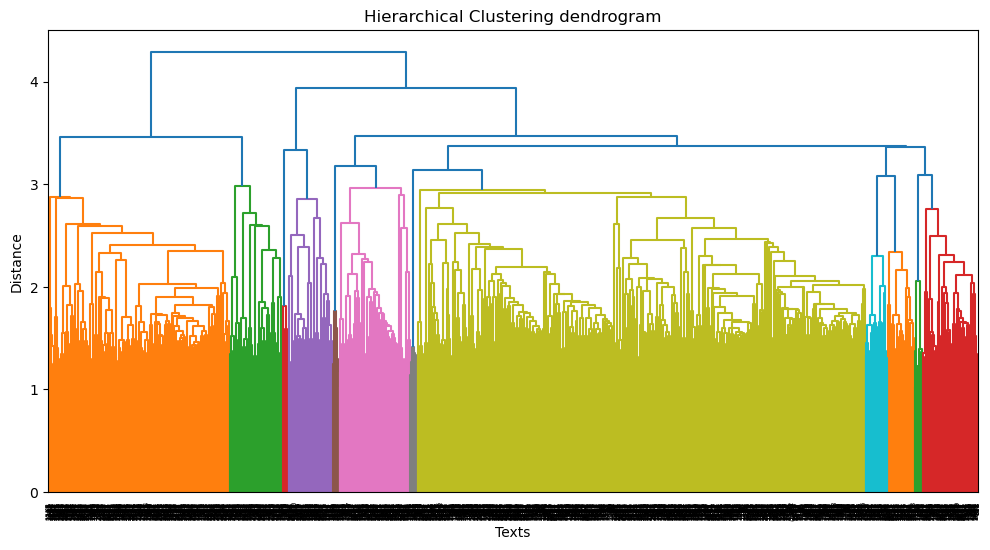

In [6]:
# calculate connections between clusters
linkage_matrix = linkage(tfidf_matrix.toarray(), method='ward')

# plot dendogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level')
plt.xlabel('Texts')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering dendrogram')
plt.show()

After the visualization of the dendogram, it appears that a good number of clusters is 12.

## 4. Clustering

Now we can apply Hierarchical Clustering to our dataset. Using the sklearn package, this is very easy. 

In [8]:
# Execute Hierarchical Clustering with given number of clusters

num_clusters = 12
clustering = AgglomerativeClustering(n_clusters=num_clusters)
clustering.fit(tfidf_matrix.toarray())
cluster_labels = clustering.labels_

In [9]:
# Add the clusters to our dataframe
df['Cluster'] = cluster_labels
df

,name,original_idx,website_url,website_text,original_language,website_text_in_en,Cluster
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel telephon advic switzerland arrang call...,3
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,kunveno work happier work happier boost cultur...,6
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,scopaswer work someth new check here,6
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,studymaniac studi success open main menu partn...,4
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,aicon artifici intellig cloud advanc analyt fu...,1
...,...,...,...,...,...,...,...
3284,Coleap,4994,https://coleap.com/,Coleap Transform your content into incomeTurn ...,en,coleap transform content incometurn content in...,6
3285,Trade Machines FI,4995,http://trademachines.com,▷ All used industrial equipment online on Trad...,en,use industri equip onlin trademachinesenglishu...,6
3286,Yasoon,4996,http://yasoon.com/,Home - yasoon Patrick Partner Manager Get in t...,en,home yasoon patrick partner manag get touch mi...,1
3287,Phoneboost,4997,https://www.phoneboost.de/,Phoneboost – Boost up your phone! AKKU LEER?PH...,de,phoneboost boost phone batteri emptyphoneboost...,6


## 4. Visualization

In order to interpret the clusters and identify the matching industry branches, we need to visualize the topics for each cluster. We use the Wordcloud package to do so.

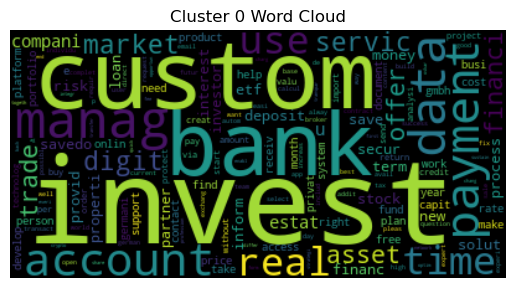

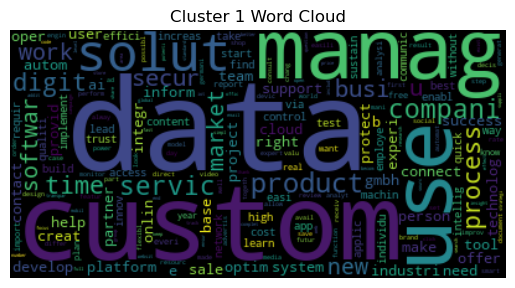

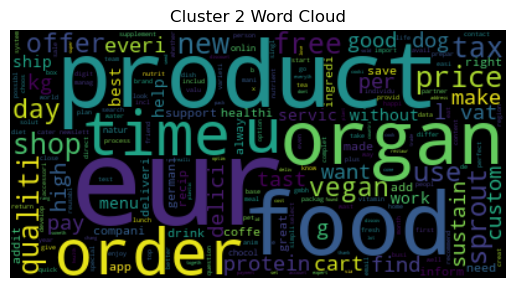

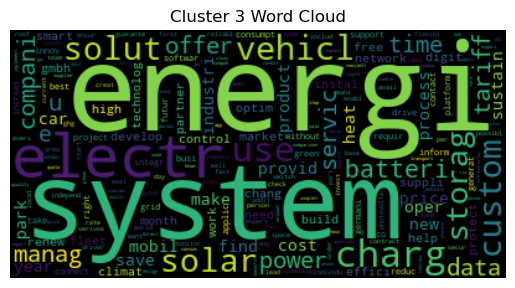

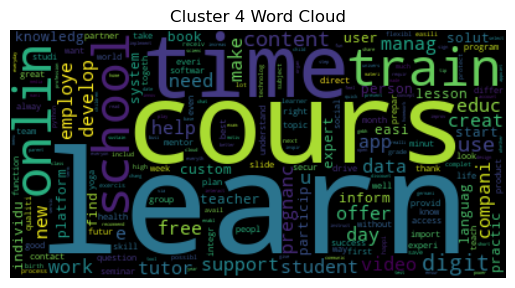

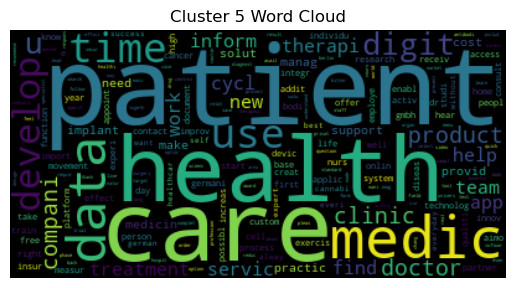

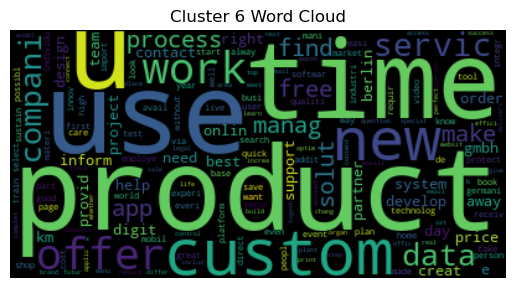

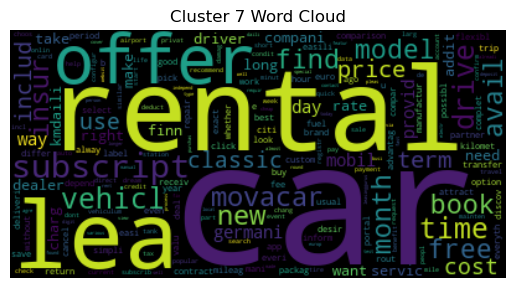

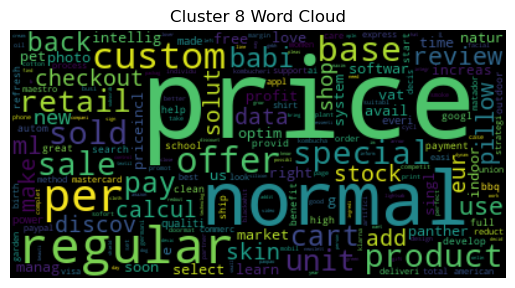

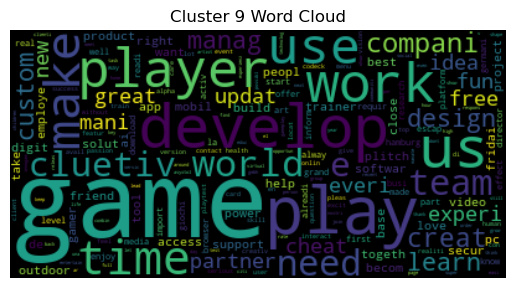

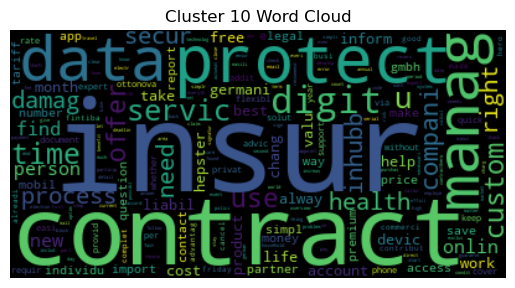

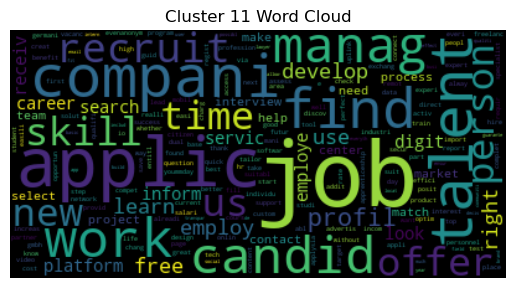

In [10]:
# Visualize the clusters with Wordclouds
for cluster in range(num_clusters):
    cluster_texts = df.loc[df['Cluster'] == cluster, 'website_text_in_en']


    # Plot relevant words of the cluster
    cluster_text = ' '.join(cluster_texts)
    wordcloud = WordCloud(collocations=False).generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()



Now we try to map a possible industry branch to each cluster. Here is the suggested mapping:

In [14]:
cluster_industry_mapping = {
    0: 'Investements and Financial Services',
    1: 'Digital Services',
    2: 'Online Food Ordering and Delivery',
    3: 'Clean Energy Solutions and Electric Vehicles',
    4: 'Online Learning and Education',
    5: 'Healthcare and Patient Care',
    6: 'Product Development and Custom Solutions',
    7: 'Car Rental and Subscriptions',
    8: 'Special Price Offers and Discounts',
    9: 'Gaming and Game Development',
    10: 'Insurance and Data Protection',
    11: 'Job Application and Talent Management'
}

Here is the result of the final dataframe with the new clusters:

In [15]:
df['New_Industry_Branch'] = df['Cluster'].map(cluster_industry_mapping)
df

,name,original_idx,website_url,website_text,original_language,website_text_in_en,Cluster,New_Industry_Branch
0,itravel,0,https://www.itravel.de/,itravel Telefonische Beratung +49 221 8282 888...,de,itravel telephon advic switzerland arrang call...,3,Clean Energy Solutions and Electric Vehicles
1,kunveno,2,https://kunveno.de,Kunveno - Work Happier WORK HAPPIER Booste Unt...,de,kunveno work happier work happier boost cultur...,6,Product Development and Custom Solutions
3,Scopas,4,https://www.scopas.io/,ScopasWe're working on something new.Check it ...,en,scopaswer work someth new check here,6,Product Development and Custom Solutions
4,studymaniac,5,https://studymaniac.de,Studymaniac - erfolgreich Studieren Open main ...,de,studymaniac studi success open main menu partn...,4,Online Learning and Education
6,Aicone,9,http://www.ai-c.one,Aicone - Artificial Intelligence Cloud One | A...,en,aicon artifici intellig cloud advanc analyt fu...,1,Digital Services
...,...,...,...,...,...,...,...,...
3284,Coleap,4994,https://coleap.com/,Coleap Transform your content into incomeTurn ...,en,coleap transform content incometurn content in...,6,Product Development and Custom Solutions
3285,Trade Machines FI,4995,http://trademachines.com,▷ All used industrial equipment online on Trad...,en,use industri equip onlin trademachinesenglishu...,6,Product Development and Custom Solutions
3286,Yasoon,4996,http://yasoon.com/,Home - yasoon Patrick Partner Manager Get in t...,en,home yasoon patrick partner manag get touch mi...,1,Digital Services
3287,Phoneboost,4997,https://www.phoneboost.de/,Phoneboost – Boost up your phone! AKKU LEER?PH...,de,phoneboost boost phone batteri emptyphoneboost...,6,Product Development and Custom Solutions
